# Statistics

### Describing single set of data

In [89]:
import random
num_friends = [random.randrange(1, random.randrange(50, 100)) for _ in range(200)]

<BarContainer object of 101 artists>

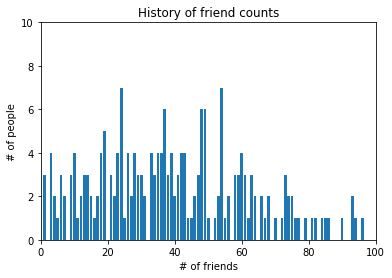

In [90]:
from matplotlib import pyplot as plt
from collections import Counter
friend_count = Counter(num_friends)
xs = range(101)
ys = [friend_count[x] for x in xs]
plt.axis([0, 100, 0, 10])
plt.title("History of friend counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.bar(xs, ys)


In [91]:
num_points = len(num_friends)
largest = max(num_friends)
lowest = min(num_friends)
print(num_points, largest, lowest)

200 96 1


### Central tendencies

#### Mean, Median, Mode gives notion of where our data is centered

In [92]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

39.32

In [93]:
def median(v):
    """Finds middlemost value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return middle value
        return sorted_v[midpoint]
    else:
        # if even, return average of middle values
        lo = midpoint + 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
median(num_friends)

37.5

#### Mean is sensitive to outliers of data while the median remains almost the same for new outliers added to data

In [74]:
y = num_friends.copy()
print(mean(y), median(y))
y += [1000]
print(mean(y), median(y))

36.195 33.5
40.99004975124378 33


*TODO : Efficient tricks to compute median without soriting*

#### Generalization of median is *quantile*, which represents the value less than which certain percentile of data lies.

* Median represents the value less than which 50% of data lies

In [94]:
def quantile(x, p):
    """Return the pth percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [95]:
quantile(num_friends, 0.1)

10

In [96]:
quantile(num_friends, 0.3)

24

In [97]:
quantile(num_friends, 0.6)

43

In [98]:
quantile(num_friends, 0.9)

73

#### Mode is the most commonly occuring value

In [99]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [100]:
mode(num_friends)

[24, 54]

### Dispersion

#### Measure of how spread our data is.
#### Values near 0 signify not spread and large values means very spread out.

In [101]:
def data_range(x):
    # Undispersed means all values are equal and hence max and min are eqaul
    return max(x) - min(x)

def de_mean(x):
    """Returns values deducted by the mean"""
    m = mean(x)
    return [x_i - m for x_i in x]

def variance(x):
    """Requires atleast 2 values in list"""
    n = len(x)
    deviations = de_mean(x)
    sum_of_squared_deviation = sum(x_i**2 for x_i in deviations)
    return sum_of_squared_deviation / (n - 1)

variance is $$ \frac{\sum (x_\mu - x)^2}{n - 1}$$

In [102]:
variance(num_friends)

507.8568844221106

#### Standard deviation is square root of variance

In [103]:
import math
def standard_deviation(x):
    return math.sqrt(variance(x))

In [104]:
standard_deviation(num_friends)

22.535680252038336

### Correlation

In [105]:
friends = [100, 10, 20, 80, 50]
num_minutes = [40, 10, 13, 35, 25]

def dot(x, y):
    return sum(i * j for i, j in zip(x, y))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(friends, num_minutes)

503.50000000000006